In [ ]:
1. What are the three stages to build the hypotheses or model in machine
learning?


a) Model building 
b) Model testing 
c) Applying the model 

In [ ]:
2. What is the standard approach to supervised learning?


The standard approach to supervised learning is to split the set of example into the training set and the test.

In [ ]:
3. What is Training set and Test set?


In various areas of information science like machine learning, a set of data is used to discover the potentially predictive relationship known as ‘Training Set’. Training set is an examples given to the learner, while Test set is used to test the accuracy of the hypotheses generated by the learner, 
and it is the set of example held back from the learner. Training set are distinct from Test set.

In [ ]:
4. What is the general principle of an ensemble method and what is
bagging and boosting in ensemble method?


The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm in order to improve robustness over a single model.
Bagging is a method in ensemble for improving unstable estimation or classification schemes. Bagging both can reduce errors by reducing the variance term.
Boosting method are used sequentially to reduce the bias of the combined model. Boosting can reduce errors by reducing the variance term.

In [ ]:
5. How can you avoid overfitting ?

1. Simplifying The Model
2. Early Stopping
3. Use Data Augmentation
4. Use Regularization

2.2. Problem Statement: Machine Learning 2

Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
bos_data=pd.DataFrame(boston.data,columns =boston.feature_names)

In [7]:
bos_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos_data['MEDV']=boston.target

In [9]:
bos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
bos_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
bos_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [13]:
bos_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


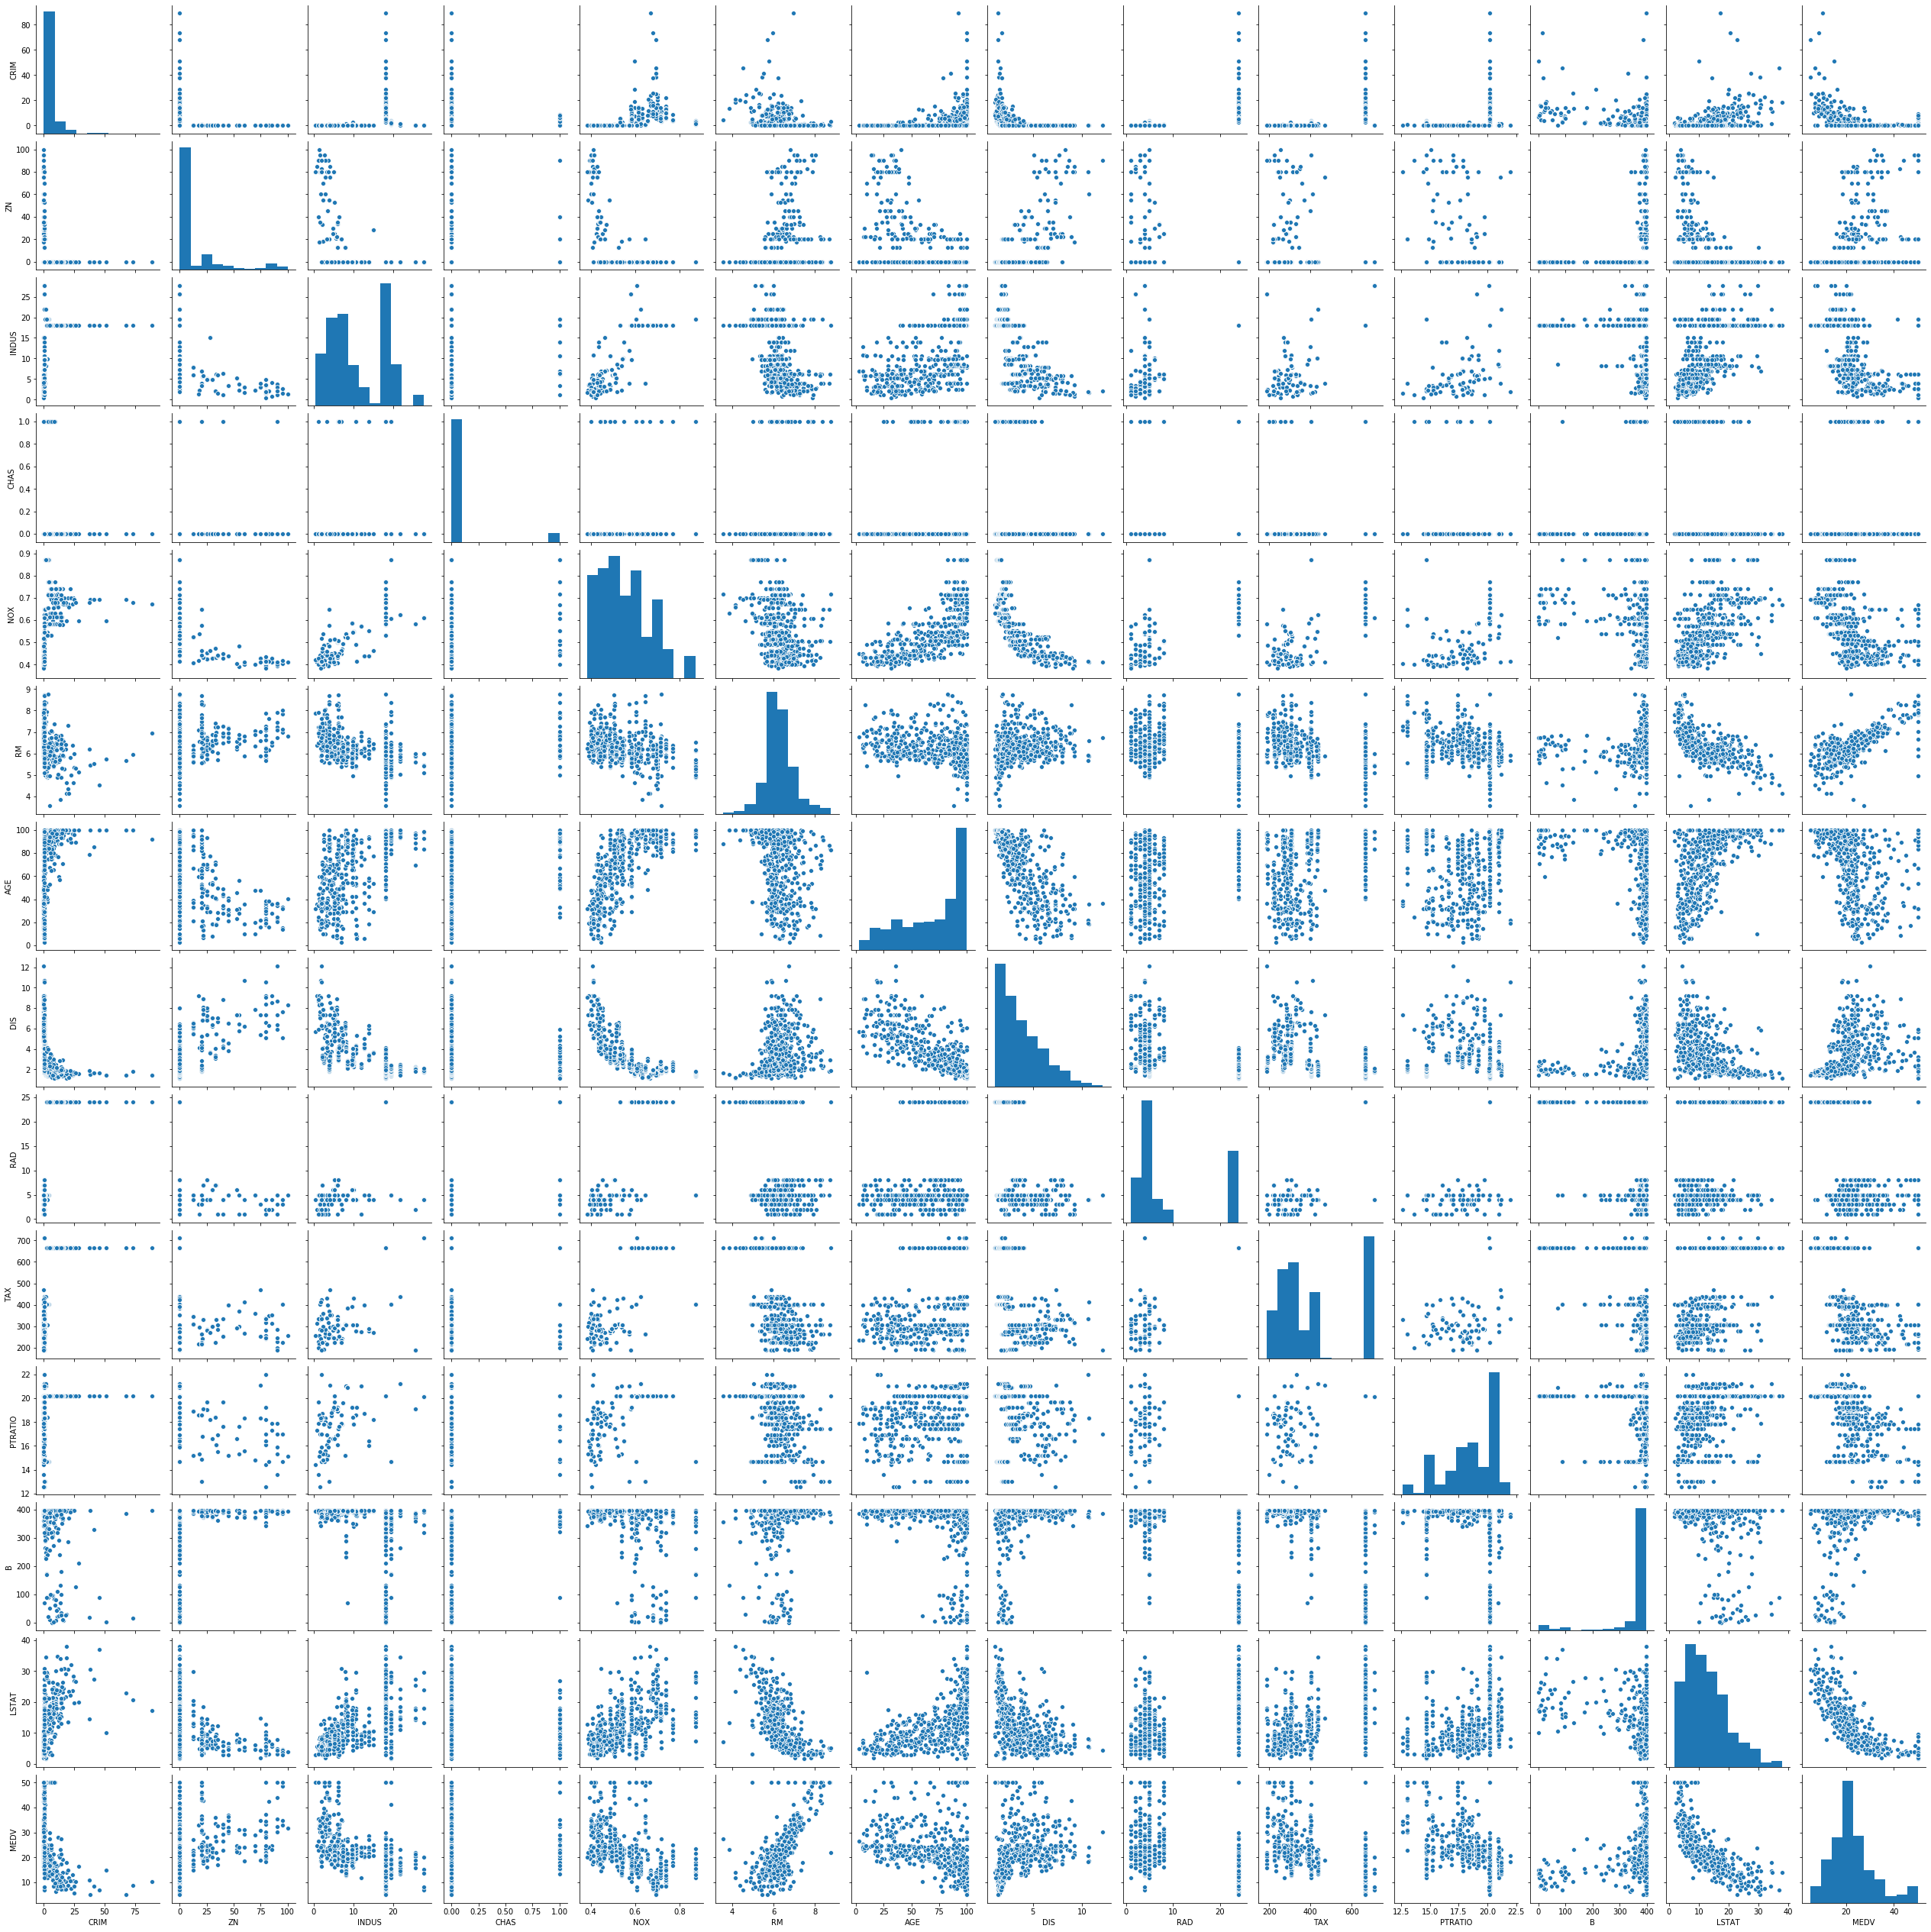

In [14]:
sns.pairplot(bos_data)

In [16]:
correlation =bos_data.corr()

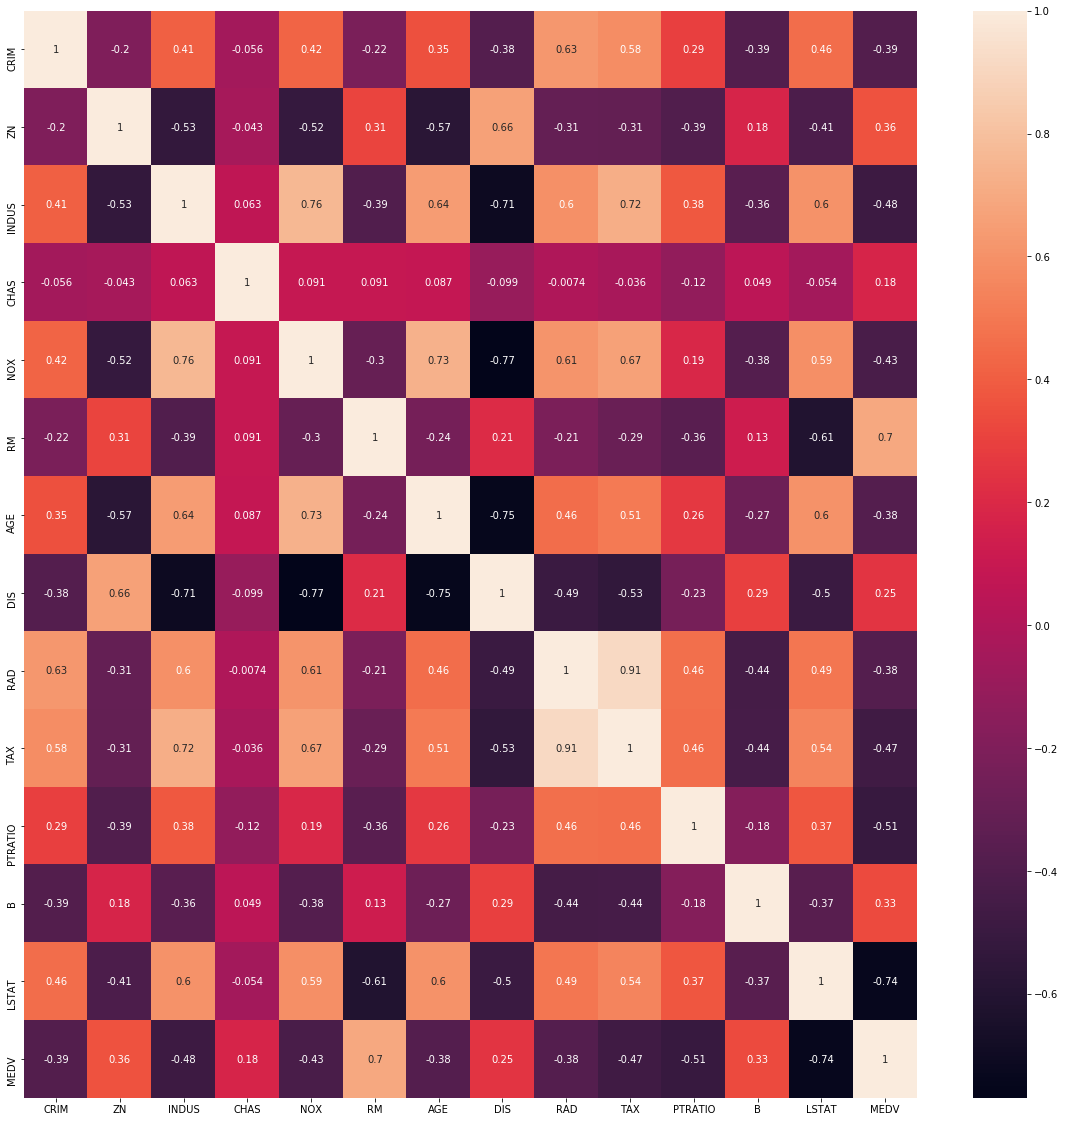

In [22]:
plt.figure(figsize=(20,20))

sns.heatmap(data=correlation,annot=True)

In [26]:
bos_data.drop(['CHAS','B','TAX'],axis =1,inplace=True)

In [27]:
bos_data.drop(['DIS'],axis =1,inplace=True)

In [28]:
bos_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,18.7,5.33,36.2


In [30]:
###Splitting into X and Y
X =bos_data[['CRIM','ZN','INDUS','NOX','RM','AGE','RAD','PTRATIO','LSTAT']]

In [31]:
Y=bos_data['MEDV']

In [33]:
###Train test split #########
from sklearn.model_selection import train_test_split


In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.2,random_state =5)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 9)
(102, 9)
(404,)
(102,)


In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
### predicting Y values 
Y_predicted =model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predicted)))


In [40]:
print(rmse)

4.935211649864365


2.3. Problem Statement: Machine Learning 3
I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 

In [2]:
affairdata=sm.datasets.fair.load_pandas().data

In [11]:
affairdata["affair"]=(affairdata.affairs> 0).astype(int)

In [12]:
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [13]:
affairdata.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [17]:
affairdata.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [19]:
affairdata.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [20]:
affairdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [21]:
import seaborn as sns

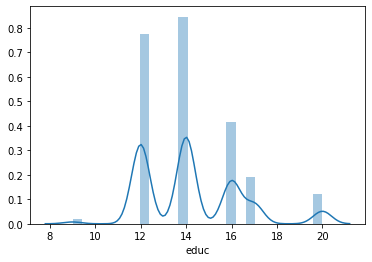

In [23]:
sns.distplot(affairdata["educ"])

(array([  48.,    0., 2084.,    0., 2277.,    0., 1117.,  510.,    0.,
         330.]),
 array([ 9. , 10.1, 11.2, 12.3, 13.4, 14.5, 15.6, 16.7, 17.8, 18.9, 20. ]),
 <a list of 10 Patch objects>)

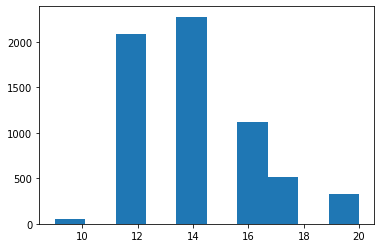

In [24]:
plt.hist(affairdata["educ"])

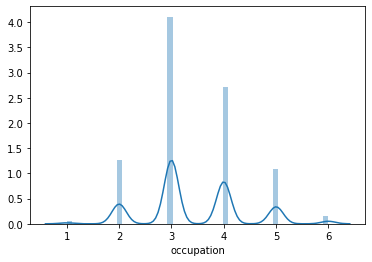

In [25]:
sns.distplot(affairdata["occupation"])

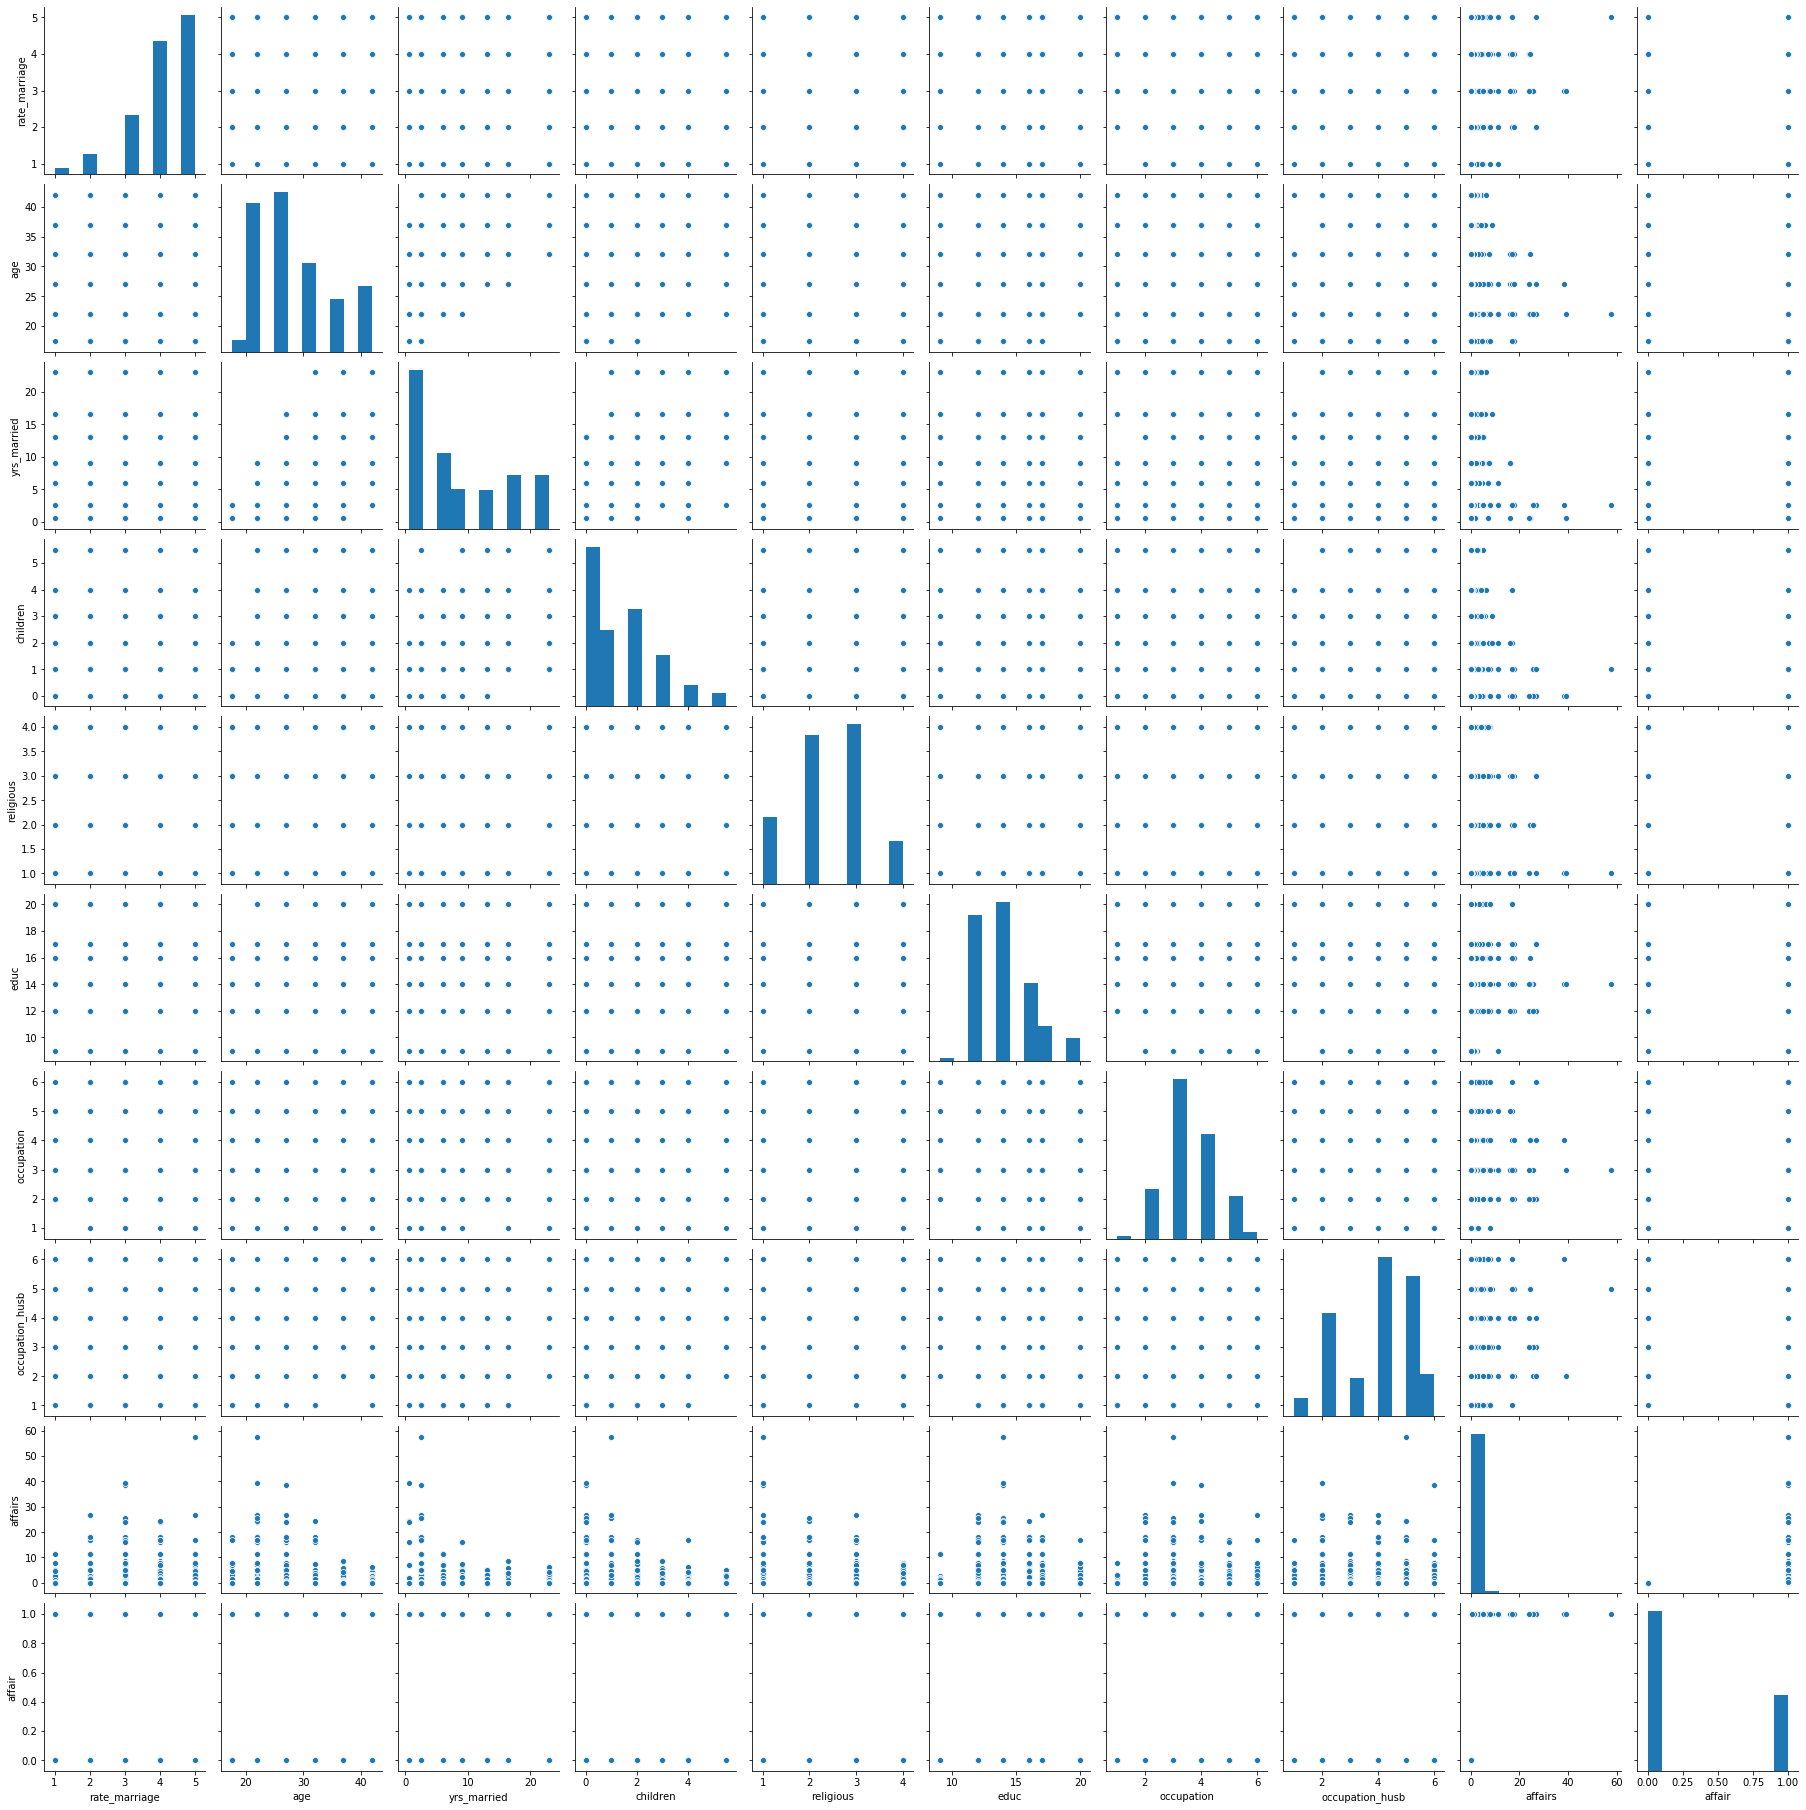

In [26]:
sns.pairplot(affairdata)

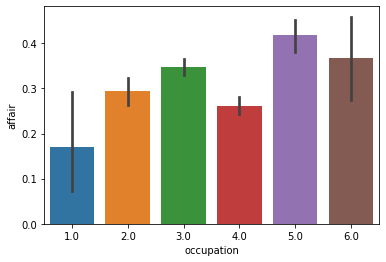

In [27]:
sns.barplot(x=affairdata["occupation"],y=affairdata["affair"])

In [28]:
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [39]:
from patsy import dmatrices
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)',
affairdata, return_type="dataframe")

In [41]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [35]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [42]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [43]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [45]:
model =LogisticRegression()
model.fit(X,y)

C:\Users\pragupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pragupta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y.shape

(6366, 1)

In [48]:
y=np.ravel(y)

In [52]:
y.shape

(6366,)

In [53]:
model.fit(X,y)

C:\Users\pragupta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model.score(X,y)

0.7251021049324536

In [56]:
model.coef_

array([[ 1.38349366,  0.06111362,  0.38297488,  0.12135087,  0.77403867,
         0.23691876,  0.30252067,  0.44068012,  0.25547145,  0.27161954,
         0.23977286, -0.68186908, -0.05878133,  0.10721324,  0.01492226,
        -0.37356709,  0.013424  ]])

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [60]:
X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size =0.3,random_state =5)

In [61]:
X_train.shape

(4456, 17)

In [62]:
X_test.shape

(1910, 17)

In [63]:
Y_train.shape

(4456,)

In [64]:
Y_test.shape

(1910,)

In [66]:
model_2 =LogisticRegression()
model_2.fit(X_train,Y_train)

C:\Users\pragupta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
Y_pred=model_2.predict(X_test)

In [68]:
probabilty =model_2.predict_proba(X_test)

In [75]:
probabilty

array([[0.78733751, 0.21266249],
       [0.53119255, 0.46880745],
       [0.5495509 , 0.4504491 ],
       ...,
       [0.33183419, 0.66816581],
       [0.82407739, 0.17592261],
       [0.82962431, 0.17037569]])

In [76]:
from sklearn import metrics

In [79]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      1319
         1.0       0.59      0.38      0.46       591

    accuracy                           0.73      1910
   macro avg       0.68      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [80]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[1163,  156],
       [ 365,  226]], dtype=int64)

2.4. Problem Statement: Machine Learning 4
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanicpassengers and can be used to predict whether a passenger survived or not.

In [1]:
import pandas as pd 

In [272]:
dataset =pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")

In [273]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [274]:
##Removing unwanted columns 

In [275]:
dataset.drop(["PassengerId","Name","Ticket"],axis =1,inplace=True)

In [276]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [277]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [278]:
dataset.shape

(891, 9)

In [279]:
dataset.drop(["Cabin"],axis =1,inplace=True)

In [280]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [281]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [282]:
dataset.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [283]:
dataset.groupby("Embarked").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [284]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [285]:
dataset.groupby("SibSp").mean()

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
0,0.345395,2.351974,31.397558,0.185855,25.692028
1,0.535885,2.057416,30.089727,0.655502,44.147370
2,0.464286,2.357143,22.620000,0.642857,51.753718
3,0.250000,2.562500,13.916667,1.312500,68.908862
4,0.166667,3.000000,7.055556,1.500000,31.855556
5,0.000000,3.000000,10.200000,2.000000,46.900000
8,0.000000,3.000000,NaN,2.000000,69.550000


In [286]:
dataset.groupby("Parch").mean()

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,32.178503,0.237463,25.586774
1,0.550847,2.203390,24.422000,1.084746,46.778180
2,0.500000,2.275000,17.216912,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


In [287]:
dataset.groupby("Sex").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [288]:
dataset.pivot_table('Survived',index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


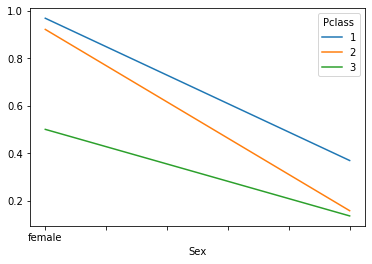

In [289]:
dataset.pivot_table('Survived',index="Sex",columns="Pclass").plot()

In [290]:
age=pd.cut(dataset["Age"],[0,18,80])

In [291]:
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: Age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [292]:
age.unique()

[(18.0, 80.0], NaN, (0.0, 18.0]]
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [293]:
dataset.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

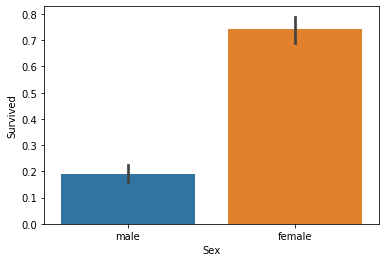

In [294]:
import seaborn as sns
sns.barplot(dataset['Sex'],dataset['Survived'])
# dataset.head()

In [295]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

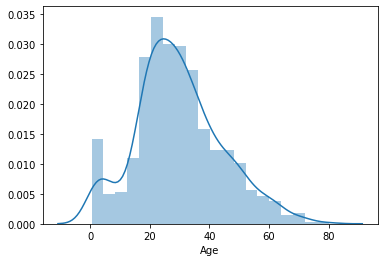

In [296]:
sns.distplot(dataset["Age"])

In [297]:
dataset["Age"].median()

28.0

In [335]:
dataset["Age"].fillna(dataset["Age"].median(),inplace=True)

In [336]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [337]:
dataset.loc[dataset["Embarked"].isnull(),:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [339]:
dataset.loc[dataset["Embarked"].isnull(),:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [342]:
from sklearn.model_selection import train_test_split


In [343]:
dataset["Sex"]=pd.get_dummies(dataset["Sex"])

In [344]:
dataset["Embarked"]=pd.get_dummies(dataset["Embarked"])

In [345]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [346]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [347]:
dataset["Fare"]=dataset["Fare"].astype('str')

In [310]:
dataset["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  83.475 ,  27.9   ,
        15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,  34.6542,
        63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,  24.15  ,
         9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,   6.975 ,
         7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,  79.2   ,
         6.75  ,  11.5   ,  36.75  ,   7.7958,  12.525 ,  66.6

In [348]:
from sklearn.tree import DecisionTreeClassifier


In [349]:
cols =dataset.columns[1:]

In [350]:
cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [351]:
X=dataset[cols]

In [352]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.25,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.925,1
3,1,1,35.0,1,0,53.1,1
4,3,0,35.0,0,0,8.05,1


In [353]:
Y =dataset["Survived"]

In [354]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [355]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [356]:
# X_train.shape
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
526,2,1,50.0,0,0,10.5,1
125,3,0,12.0,1,0,11.2417,0
142,3,1,24.0,1,0,15.85,1
21,2,0,34.0,0,0,13.0,1
542,3,1,11.0,4,2,31.275,1


In [357]:
# model=DecisionTreeClassifier()
# model.fit(X_train,Y_train)

# from sklearn.linear_model import LinearRegression
# model_1 =LinearRegression()
# model_1.fit(X_train,Y_train)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train,Y_train)

# X_train.info()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [358]:
Y_pred=decision_tree.predict(X_test)

In [359]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [361]:
confusion_matrix(Y_pred,Y_test)

array([[148,  30],
       [ 24,  65]], dtype=int64)

In [363]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1], dtype=int64)

2.5. Problem Statement: Machine Learning 5
In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [364]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)



bos.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [365]:
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [366]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [367]:
bos_data=pd.DataFrame(boston.data,columns =boston.feature_names)
bos_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [368]:
bos_data['MEDV']=boston.target
bos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [369]:
bos_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [370]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
bos_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


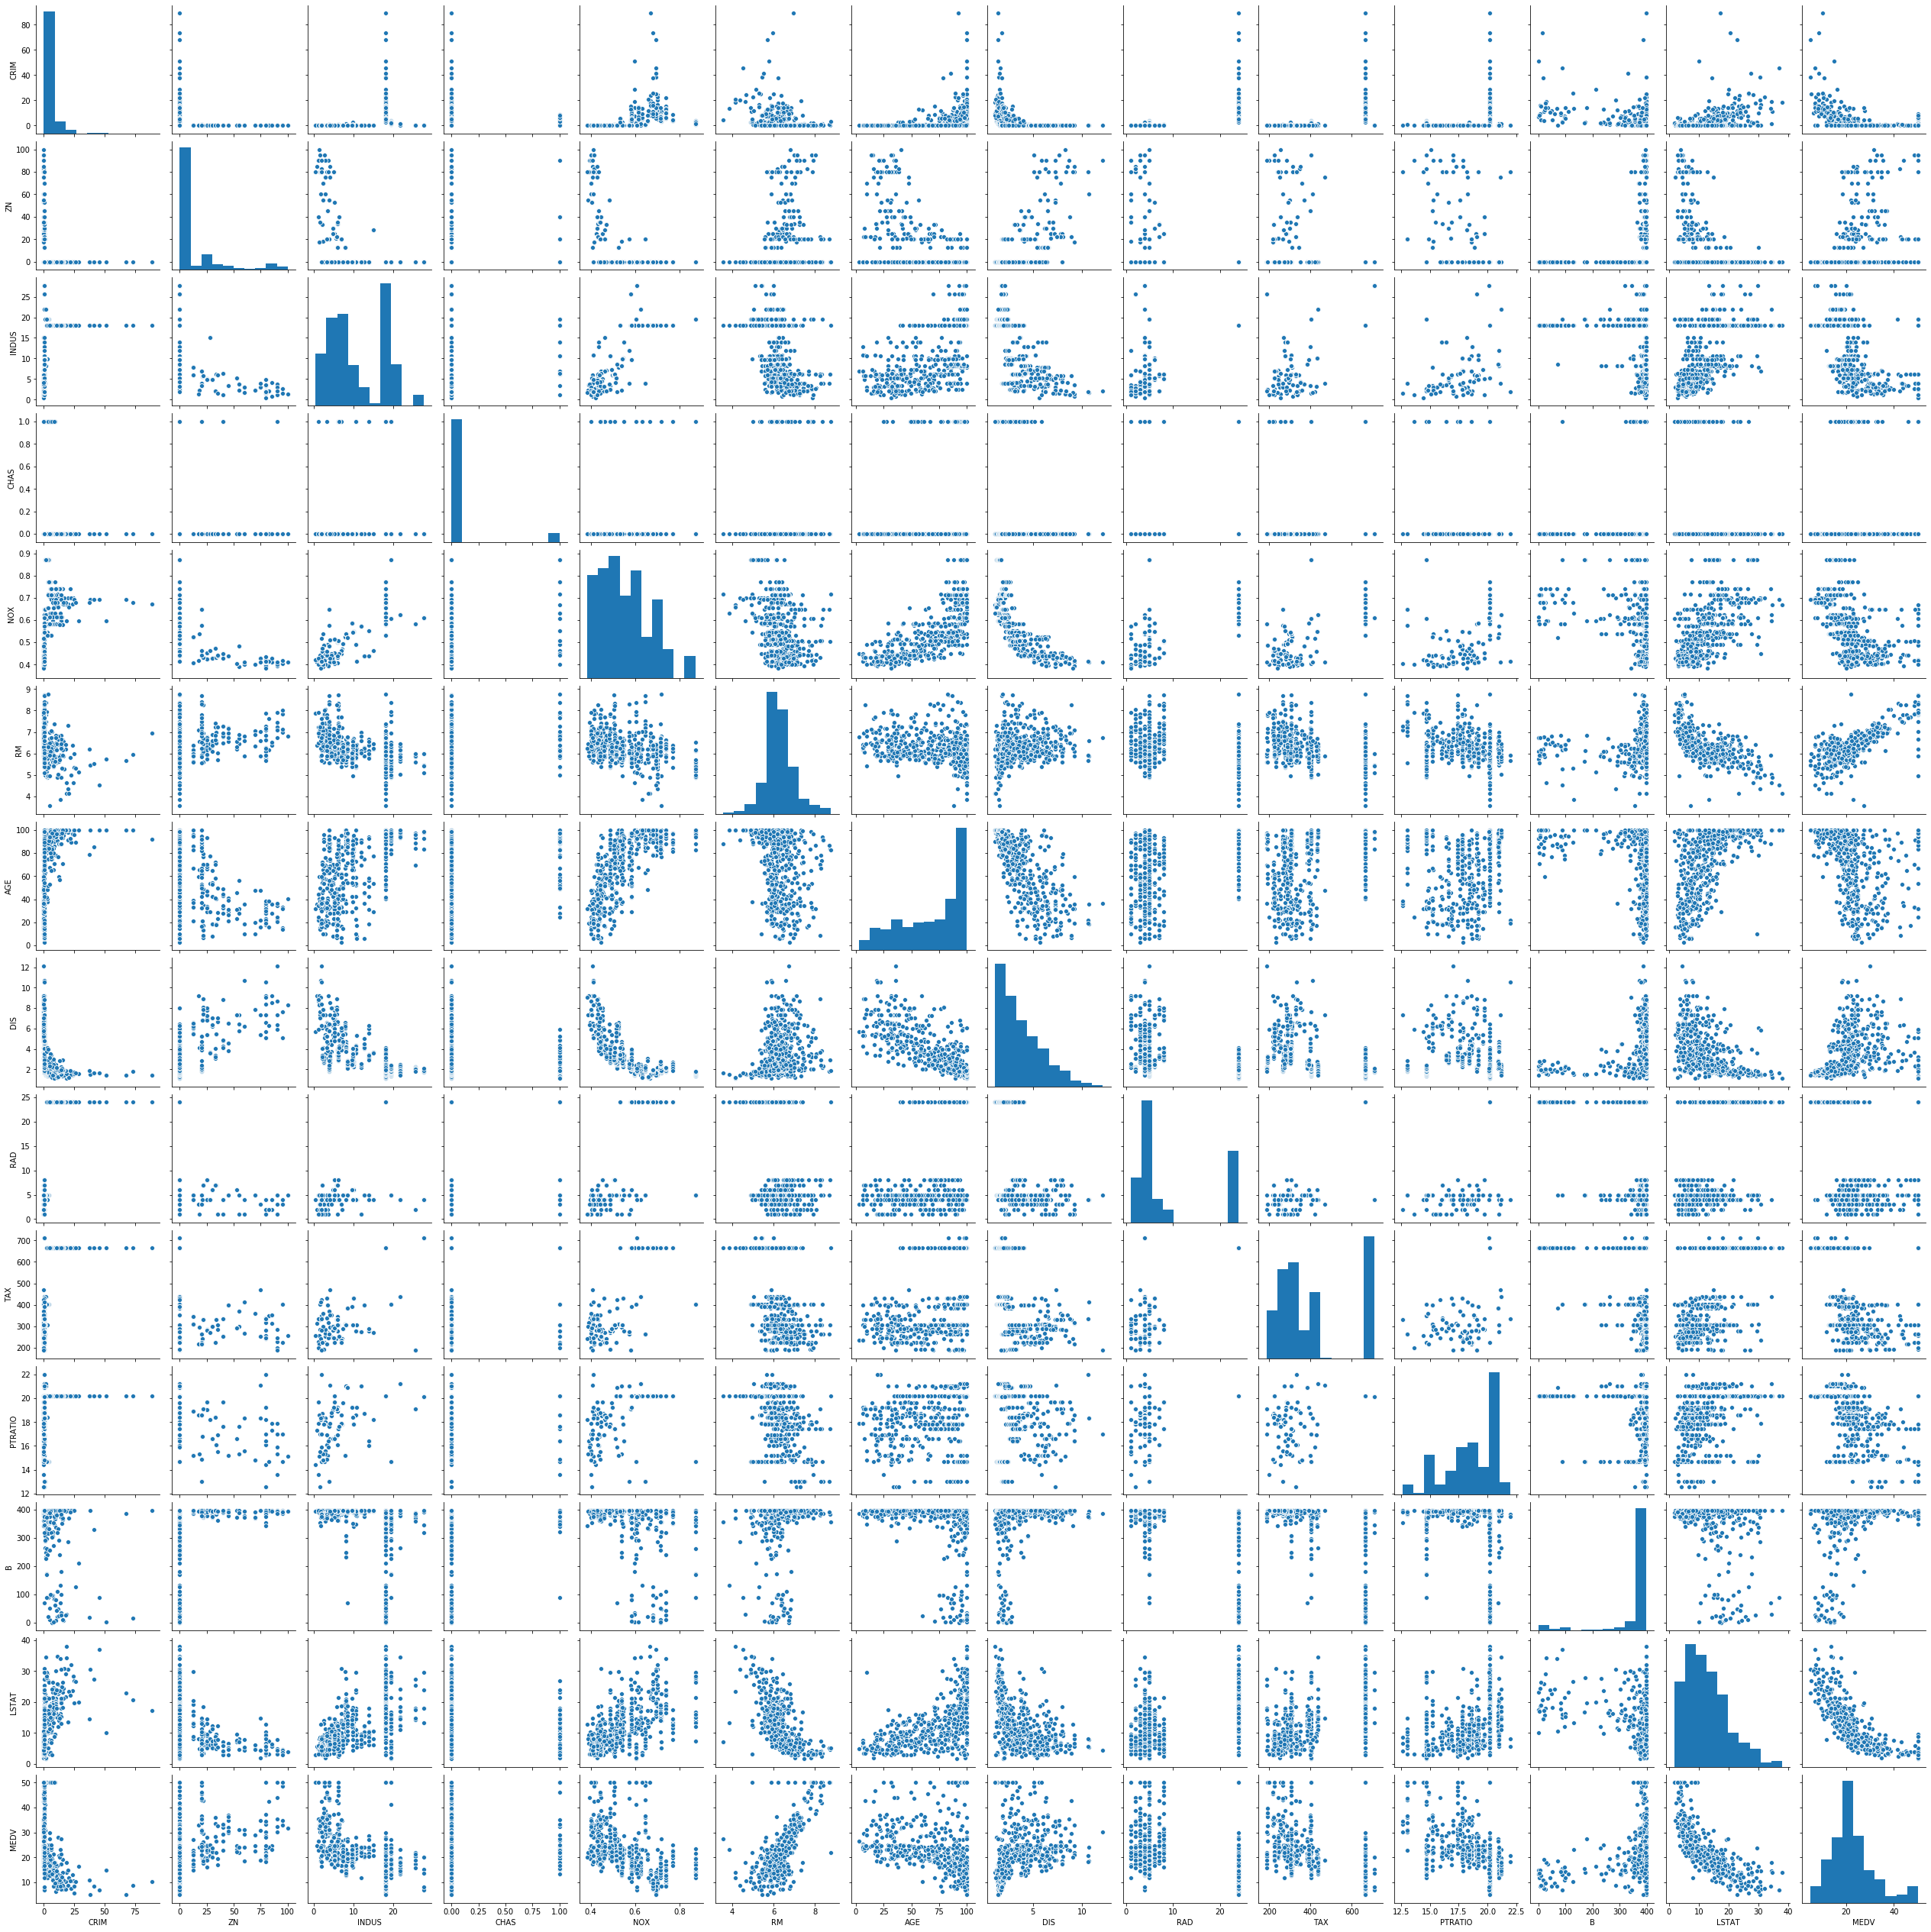

In [371]:
sns.pairplot(bos_data)


In [372]:
correlation =bos_data.corr()


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

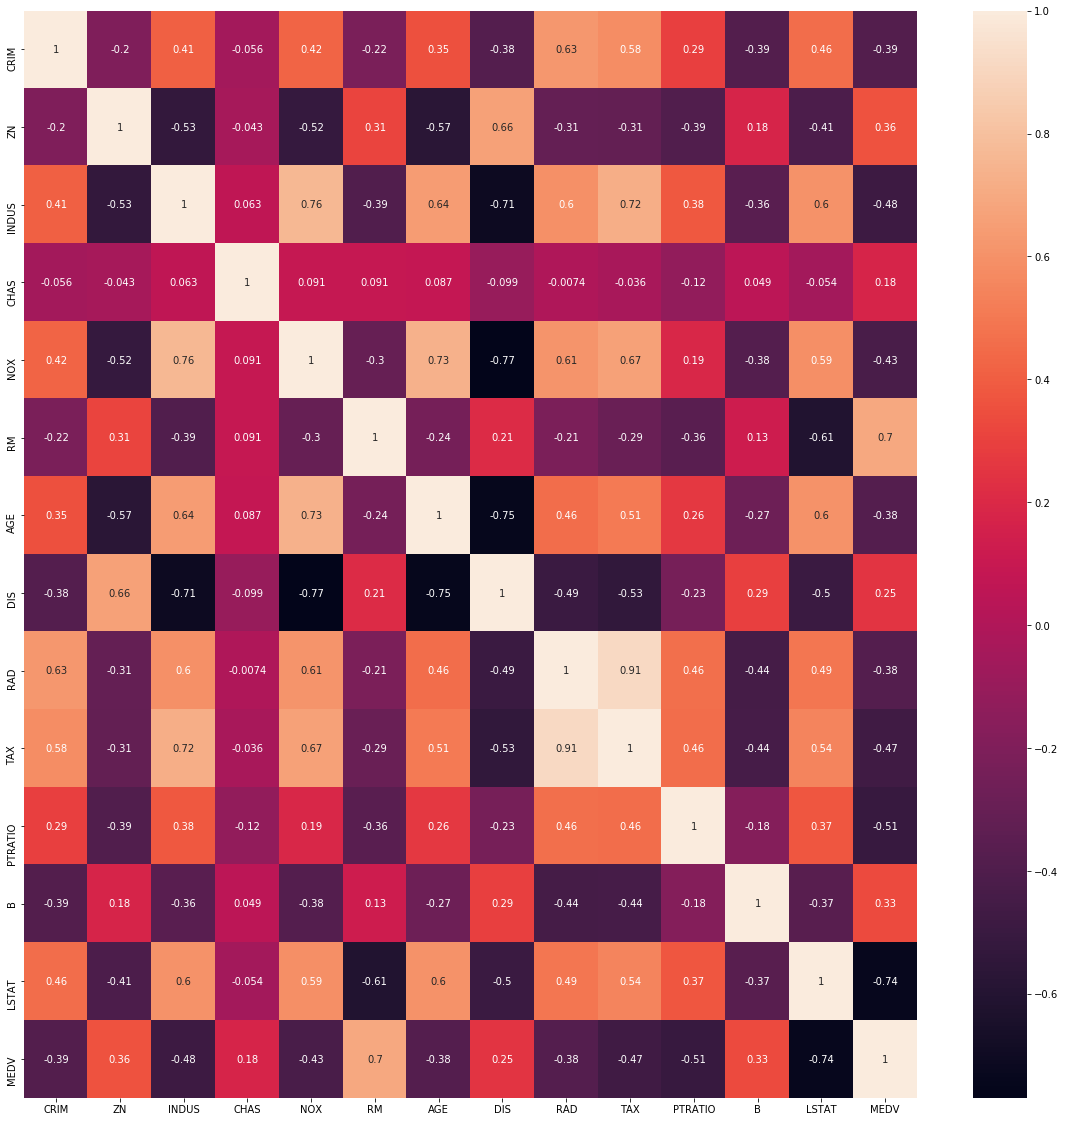

In [374]:
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation,annot=True)


In [378]:
# bos_data.drop(['CHAS','B','TAX'],axis =1,inplace=True)

# bos_data.drop(['DIS'],axis =1,inplace=True)
bos_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,18.7,5.33,36.2


In [379]:
###Splitting into X and Y
X =bos_data[['CRIM','ZN','INDUS','NOX','RM','AGE','RAD','PTRATIO','LSTAT']]

Y=bos_data['MEDV']


###Train test split #########
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.2,random_state =5)

In [380]:
from sklearn.ensemble import RandomForestRegressor

In [381]:
model_random=RandomForestRegressor()

In [382]:
model_random.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [383]:
Y_pred=model_random.predict(X_test)

In [384]:
Y_pred

array([47.243, 26.975, 22.814, 12.067, 40.149,  7.628, 27.571, 25.648,
       22.909, 18.403, 33.81 , 19.812, 20.886, 33.391, 24.106, 20.029,
       13.805, 18.172, 20.024, 27.766, 15.276, 19.297, 46.969, 21.065,
       31.571, 10.214, 23.991, 20.324, 23.578, 26.934, 17.85 , 15.77 ,
       11.782, 20.933, 23.992, 19.291, 26.112,  9.043, 47.091, 34.634,
       16.153, 14.184, 24.988, 17.667, 25.355, 30.48 ,  7.529, 18.809,
       19.299, 16.586, 19.744, 21.116, 22.942, 14.655, 15.91 , 22.953,
       42.51 , 16.246, 26.997, 21.252, 19.901, 22.147, 16.946, 33.747,
       21.194, 10.046, 18.637, 24.375, 21.885, 21.179, 16.44 , 23.352,
       19.944, 17.832, 21.987, 29.152, 20.058, 15.28 , 31.068, 15.008,
       20.217, 49.107, 18.187, 15.141, 20.478, 14.492, 19.66 ,  9.493,
       21.078, 21.479, 41.734, 18.047, 23.522, 15.156, 24.998, 26.404,
       14.917, 30.136, 21.624, 16.099, 20.711, 24.088])

In [385]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))

In [386]:
rmse

3.2468119355912877

2.6. Problem Statement: Machine Learning 6
In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:

In [1]:
import pandas as pd
# df_columns=pd.read_csv("C:/Users/pragupta/Desktop/Submission/Project_6/adult.names")
adult=pd.read_csv("C:/Users/pragupta/Desktop/Submission/Project_6/adult.data", header=None, delimiter=r"\s+",)

In [2]:
from IPython.display import display
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
# from sklearn_pandas import DataFrameMapper

import numpy as np


In [3]:
adult.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [4]:
adult.isnull().values.any()


False

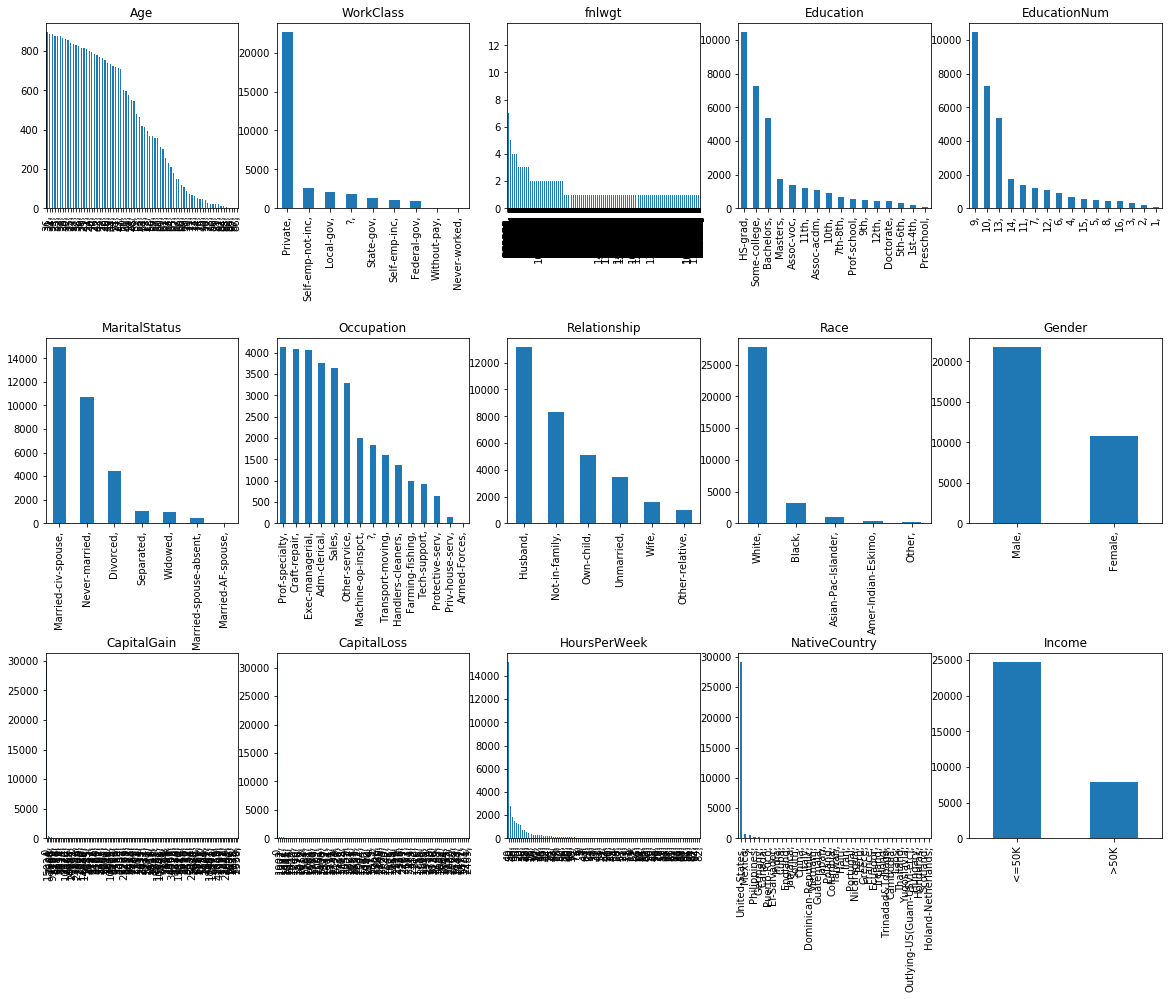

In [5]:
from math import ceil
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(adult.shape[1]) / cols)
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

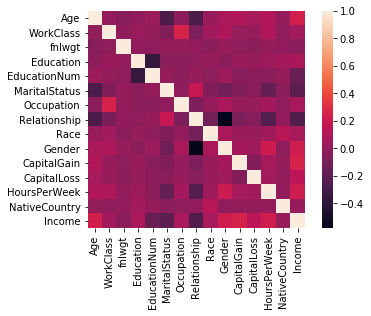

In [6]:
import sklearn.preprocessing as preprocessing
import seaborn as sns
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(adult)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [7]:
del adult["Education"]


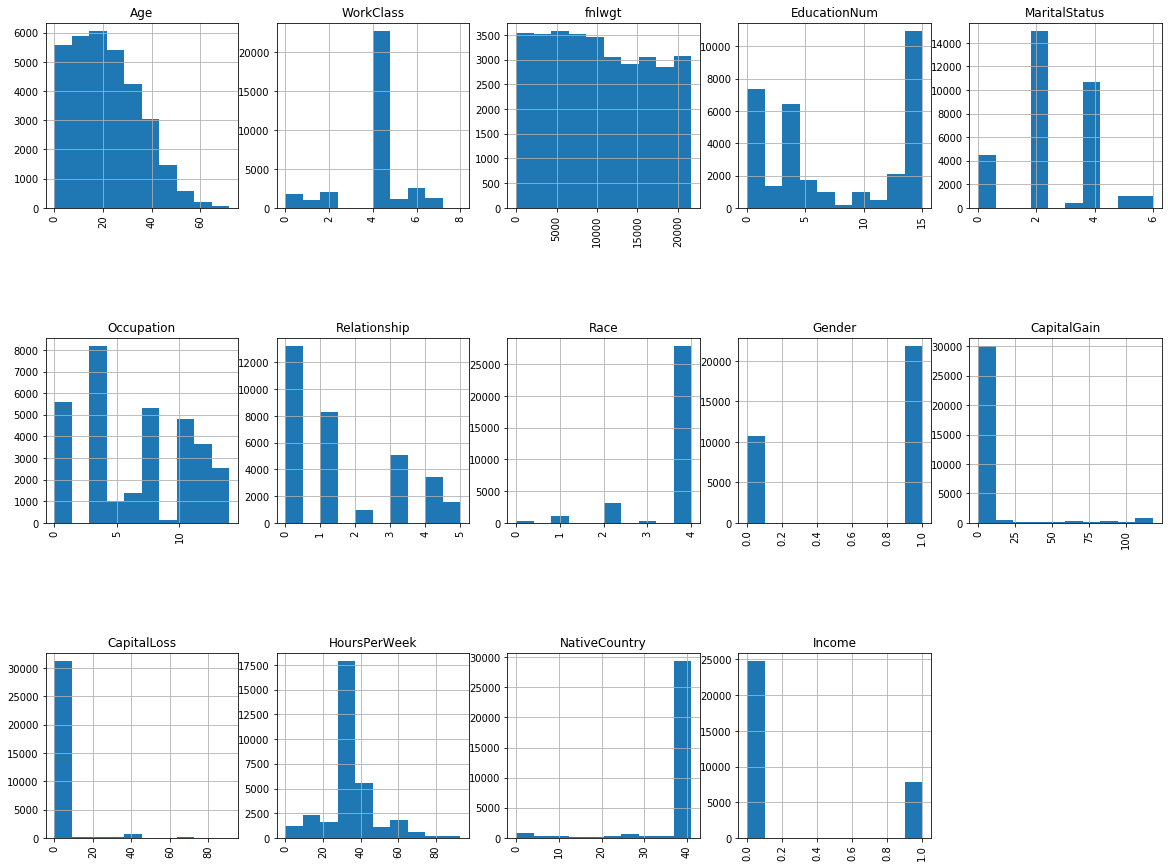

In [8]:
encoded_data, encoders = number_encode_features(adult)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [9]:
# from sklearn.model_selection import train_test_split
cols =[i for i in encoded_data.columns if i !=["Income"]]
X =encoded_data[cols]
Y =encoded_data["Income"]
# X.head()



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.70)
# scaler = preprocessing.StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("str")), columns=X_train.columns)
# X_test = scaler.transform(X_test.astype("float64"))


In [22]:
from sklearn import linear_model
from sklearn import  metrics
from xgboost.sklearn import XGBClassifier
cls = XGBClassifier()

cls.fit(X_train, y_train)
# y_pred = cls.predict(X_test)
# cm = metrics.confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(12,12))
# plt.subplot(2,1,1)
# sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Income"].classes_, yticklabels=encoders["Income"].classes_)
# plt.ylabel("Real value")
# plt.xlabel("Predicted value")
# print("F1 score: %f" % metrics.f1_score(y_test, y_pred))
# coefs = pd.Series(cls.coef_[0], index=X_train.columns)
# # coefs.sort()
# plt.subplot(2,1,2)
# coefs.plot(kind="bar")
# plt.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
y_pred = cls.predict(X_test)
# X_test


In [24]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])